Misuro la posizione di una quasar N volte, distribuiti gaussianamente con centro 1 


(array([0.00137176, 0.        , 0.        , 0.00548704, 0.00411528,
        0.00411528, 0.00411528, 0.01783288, 0.02331992, 0.02331992,
        0.03429399, 0.06447271, 0.07270326, 0.09602318, 0.13443245,
        0.1700982 , 0.24554499, 0.27435194, 0.31413297, 0.39369504,
        0.47462886, 0.55693444, 0.61317659, 0.68725162, 0.76681368,
        0.79836415, 0.76407016, 0.78739008, 0.7558396 , 0.7832748 ,
        0.73937849, 0.67902106, 0.66667522, 0.53224277, 0.40604088,
        0.37860568, 0.31687649, 0.25651907, 0.20987924, 0.18518756,
        0.14403477, 0.09327966, 0.06995975, 0.04938335, 0.03703751,
        0.03978103, 0.01234584, 0.01508936, 0.0068588 , 0.00823056]),
 array([-1.00775781, -0.93485874, -0.86195968, -0.78906061, -0.71616155,
        -0.64326248, -0.57036342, -0.49746435, -0.42456529, -0.35166622,
        -0.27876716, -0.20586809, -0.13296903, -0.06006997,  0.0128291 ,
         0.08572816,  0.15862723,  0.23152629,  0.30442536,  0.37732442,
         0.45022349,  0.52

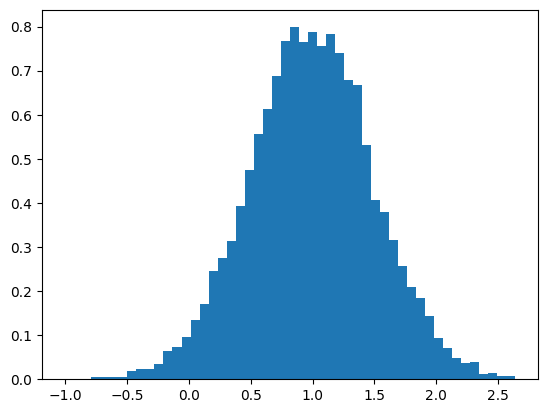

In [42]:
import numpy as np
from matplotlib import pyplot as plt

N = 10000          # ripetizioni
mu = 1           # posizione vera della quasar
sigma = 0.5      # "rumore gaussiano" attorno alla posizione vera

x = np.random.normal(mu, sigma , N)

plt.hist(x, bins = 50 , density = True)

Centro una gaussiana con sigma pari all'errore omoschedastico di 0,2 in ognuno dei punti generati. 

Questo processo equivale a plottare la likelihood di ogni singola misura

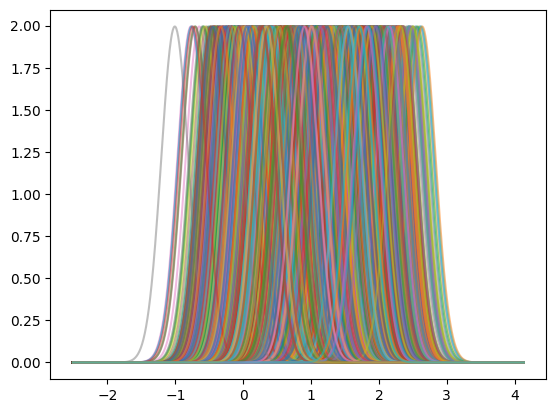

In [43]:
sigma_err = 0.2     #homoschedastic error
x_vals = np.linspace(min(x)-3*sigma, max(x)+3*sigma, 1000) #estremi di plot

for i in range(N):
    gaussiana = (1 / (sigma_err * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_vals - x[i]) / sigma_err) ** 2)
    plt.plot(x_vals, gaussiana, alpha=0.5)

plotto il prodotto delle gaussiane, cioè la likelihood dell'intero set di dati


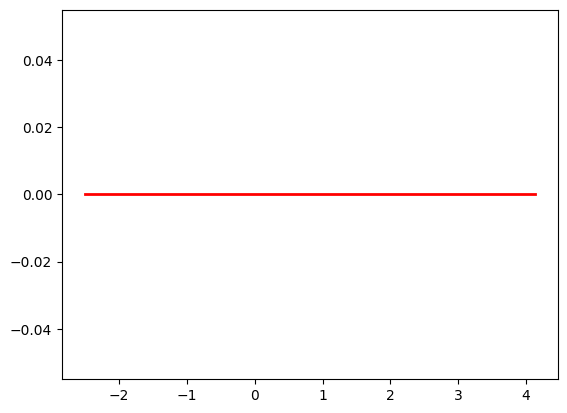

In [44]:
likelihood = []

for i in range(len(x_vals)): #calcolo la likelihood per ogni valore dell'intervallo

    L = 1

    for j in range(N): #prodotto delle PDF per ogni valore di x

        L *= (1 / (sigma_err * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x[j] - x_vals[i]) / sigma_err) ** 2) 


    likelihood.append(L)
        
plt.plot(x_vals, likelihood, color='red', linewidth=2)

magari ne prendiamo il logaritmo 

/tmp/ipykernel_1675/172700294.py:1: RuntimeWarning: divide by zero encountered in log
  likelihood = np.log(likelihood) #logaritmo della likelihood


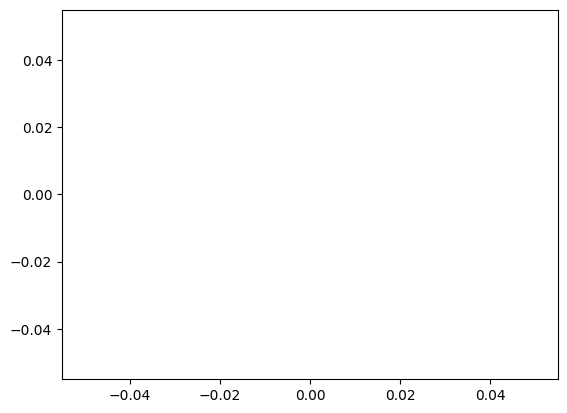

In [45]:
likelihood = np.log(likelihood) #logaritmo della likelihood

plt.plot(x_vals, likelihood, color='red', linewidth=2)

cerco il max della log likelihood

In [46]:
x_max_log_like = x_vals[np.argmax(likelihood)] #valore di x corrispondente al massimo della log-likelihood
print('Il valore massimo della log-likelihood è:', x_max_log_like)

# comparo ora con lo stimatore di mu
mu_hat = np.mean(x)
print('Il valore stimato di mu è:', mu_hat)

err_max_log = np.abs(x_max_log_like - mu)/mu
err_mu_hat = np.abs(mu_hat - mu)

print('\n\nErrore relativo sul massimo della log-likelihood:', err_max_log)
print('Errore relativo sullo stimatore di mu:', err_mu_hat)

if (err_max_log < err_mu_hat):
    print('\n\nIl massimo della log-likelihood è uno stimatore più efficiente di mu')
else:
    print('\n\nLo stimatore di mu è più efficiente del massimo della log-likelihood')

Il valore massimo della log-likelihood è: -2.5077578052247946
Il valore stimato di mu è: 0.9903465679940022


Errore relativo sul massimo della log-likelihood: 3.5077578052247946
Errore relativo sullo stimatore di mu: 0.009653432005997775


Lo stimatore di mu è più efficiente del massimo della log-likelihood
